# S13 Group 8: Project - Phase 1

## Members:
- Ano, Joseph Thomas M.
- Limjoco, Jared Ethan D. 
- Nadela, Cymon Radjh O.

In this Notebook, we will be using the [League of Legends Worlds 2021 Main Event - Champion Stats](https://www.kaggle.com/datasets/vincentbarletta/league-of-legends-worlds-champion-pb-dataset?select=Worlds+2021+Main+Event+-+Champion+Stats+-+OraclesElixir.csv). The notebook will cover four main parts namely the **dataset description**, **data cleaning**, the **exploratory data analysis questions**, and the group's **proposed research questions**. 



---
## Data Set Description

### Brief description of dataset
This data set contains the list of every champion either picked or banned during the 2021 League of Legends World tournament. As metioned in its kaggle page, the main statistics of this particular data set include the champion name, position, pick rate, ban rate, pick+ban rate, and more individual champion statistics (Kill, Death, Assist, KDA rate, etc). Each column also has a breif description explaining the variable.

### Description of the data collection process
The data was collected from a popular website called [Oracle's Elixir](https://oracleselixir.com/about), the premier source for advance League of Legends esports statistics and was posted on kaggle by the user Vincent Barletta. All of the data comes from the analysts and data scrapers at Oracles Elixir who retrive the data from several sources including including Match History pages, [lolesports.com](https://lolesports.com), [lpl.QQ.com](https://lpl.qq.com), [Leaguepedia](https://lol.fandom.com/wiki/League_of_Legends_Esports_Wiki), the Riot Games solo queue APIs, and more 

### Structure of the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sets the theme of the charts
#plt.style.use('seaborn-darkgrid')

%matplotlib inline

In [2]:
lol_df = pd.read_csv('Worlds 2021 Main Event - Champion Stats - OraclesElixir.csv')
lol_df.head()

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Middle,1,1.2%,1.2%,4.8%,100%,100%,2,2,...,46,467,-2,8.8,25.1%,377,22.1%,20.9%,0.21,0.38
1,Aatrox,Top,2,2.4%,1.2%,4.8%,50%,100%,6,2,...,14,184,-10,7.9,25.0%,260,17.5%,24.0%,0.36,0.22
2,Alistar,Support,5,6.0%,0.0%,6.0%,40%,80%,6,19,...,-44,-77,2.4,0.9,1.9%,121,7.1%,8.4%,1.96,0.34
3,Amumu,Support,1,1.2%,7.2%,8.4%,100%,0%,2,4,...,-39,446,2,0.8,1.8%,155,6.6%,8.8%,1.69,0.34
4,Annie,Middle,2,2.4%,1.2%,3.6%,50%,100%,6,6,...,-345,-457,-14,5.6,16.4%,396,20.1%,16.6%,0.6,0.11


In [3]:
lol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Champion  94 non-null     object
 1   Pos       94 non-null     object
 2   GP        94 non-null     int64 
 3   P%        94 non-null     object
 4   B%        94 non-null     object
 5   P+B%      94 non-null     object
 6   W%        94 non-null     object
 7   CTR%      94 non-null     object
 8   K         94 non-null     object
 9   D         94 non-null     object
 10  A         94 non-null     object
 11  KDA       94 non-null     object
 12  KP        94 non-null     object
 13  DTH%      94 non-null     object
 14  FB%       94 non-null     object
 15  GD10      94 non-null     object
 16  XPD10     94 non-null     object
 17  CSD10     94 non-null     object
 18  CSPM      94 non-null     object
 19  CS%P15    94 non-null     object
 20  DPM       94 non-null     object
 21  DMG%      94 non-n

The data set contains a total of **94 observations** and is made up of **25 variables**. Each row in the data set represents a the game statistics of a champion that was either picked or banned during the tournament. You may notice that there are observations consisting of the same value for the variable **`Champion`**, this is because a champion can be played in more than one postion which will result in the data set having rows/observations each with a unique combination of the **`Champion`** and **`Pos`** variable 

### Description of each variable
- **`Champion`**: Name of the champion picked/banned
- **`Pos`**: Position the champion played in. Values include Top, Middle, ADC, Jungle, and Support
- **`GP`**: Total number of games the champion was picked/played in this role
- **`P%`**: Percentage of games champion was picked in this role
- **`B%`**: Percentage of games in which the champion was banned (not tied to a specific role)
- **`P+B%`**: Percentage of games in which the champion was either banned or picked in any role
- **`W%`**: Win percentage of champion in a specific role
- **`CTR%`**: Counter-pick rate: percentage of games in which this player/champion was picked after their lane opponent 
- **`K`**: Total kills a champion had 
- **`D`**: Total deaths a champion had 
- **`A`**: Total assists a champion had 
- **`KDA`**: Total Kill/Death/Assits ration for a champion 
- **`KP`**: Kill participation which is the percentage of the team's kills in which the champion earned a Kill or Assist 
- **`DTH%`**: Average share of team’s deaths 
- **`FB%`**: Percent of games earning a First Blood participation either kill or assist 
- **`GD10`**: Average gold difference from lane opponent at 10 minutes 
- **`XPD10`**: Average experience difference from lane opponent at 10 minutes
- **`CSD10`**: Average creep score difference from lane opponentat 10 minutes
- **`CSPM`**: Average monsters + minions killed per minute
- **`CS%P15`**: Average share of team's total CS post-15-minutes
- **`DPM`**: Average damage to champions per minute
- **`DMG%`**: Average share of team’s total damage to champions
- **`GOLD%`**: Average share of team’s total gold earned (excludes starting gold and inherent gold generation)
- **`WPM`**: Average wards placed per minute
- **`WCPM`**: Average wards cleared per minute

---
## Data Clean up

### Duplicate Data
The first thing we'll check for is if duplicate records exists in the data set. Since each record in this data set represents the statistics of every champion either picked (in a specific position) or banned, each record must have a unique combination of the **`Champion`** and the **`Pos`** variable. To do this, we will first select the columns of the **`Champion`** and the **`Pos`** variables which will result in a **dataframe** which we will assign to a variable called `duplicate_test`. We will then use the `duplicated` function, along with the `any` function, to check if there are any duplicated records based on these two variables.

In [4]:
duplicate_test = lol_df[['Champion', 'Pos']]
duplicate_data_exists = duplicate_test.duplicated().any()
print('Duplicated data exists: ', duplicate_data_exists)

Duplicated data exists:  False


The reason why we select the **`Champion`** and the **`Pos`** columns is because if we were to use the `duplicated` function using the original dataframe, there is a chance that two records may have the same **`Champion`** and **`Pos`** values but differ in other columns. In this case, the `duplicated` function will return a value of `false` which is wrong since we want each record to have a unique combination of the **`Champion`** and **`Pos`** variables. 

### Missing Data

In [5]:
lol_df['Pos'].value_counts()

Top        24
Middle     21
Support    17
Jungle     16
ADC        14
-           2
Name: Pos, dtype: int64

When viewing the dataset, you will notice that some records have a value of `-` in some of their variables. This is the default value when a variable of a record should be empty. For example, the code above shows that there are two records which have a value of `-` in their **`Pos`** variable. This because these two records(Champions) were never picked in the entire tournament but were banned at least once which is why they are included in this data set but with most of their variables having a value of `-`.

Since majority of their variables will not have any meaningful value, and considering the fact that there are only 2 of these records out of a total of 94 entries, we believe that it will be best to remove these two records from entire dataset. To do so we will first get the indices of the records which have a value of `-` in their **`Pos`** column. After getting the indices, we can use the `drop` function to remove these records from the data set.

In [6]:
#Get indices
dropped_index = lol_df[ lol_df['Pos'] == '-' ].index

#Drop records
lol_df = lol_df.drop(dropped_index)

#Check new number of entries
print('Number of entries in the dataframe: ', lol_df.shape[0])

#reset indices
lol_df.reset_index(drop=True, inplace=True)

#Re-check the value count of the Pos variable
lol_df['Pos'].value_counts()

Number of entries in the dataframe:  92


Top        24
Middle     21
Support    17
Jungle     16
ADC        14
Name: Pos, dtype: int64

As you can see, the new number of entries in the data set is 92 which means that the two records that we selected were removed from the data set. We can also check this by checking the value count of the **`Pos`** variable which shows that there are only 5 values for that variable. We can now ensure that there are no missing values in our data set as each record gwill contain a champion in a specific

### Categorical Values
Our data set only contains one column with categorical values which is the `Pos` column. We can see the values of this column by using the `values_count` function. Doing so, we will be able to check if there are multiple representations for the same categorical value.

In [7]:
lol_df['Pos'].value_counts()

Top        24
Middle     21
Support    17
Jungle     16
ADC        14
Name: Pos, dtype: int64

As you can see, there are 5 only types for the `Pos` column, none of which seem like a different representation of the other meaning that there is no need for us to clean/fix this column.

### Formatting of Values
Majority of the values in the data set are numbers however some of these numbers include the `%` sign as the value represents a percentage. To make it easier for future processes such as converting the variable to their apprpriate type or performing numerical operations, we can remove the `%` sign from all the values that have them. To do so, we use `%$` as the regex value with the `replace` function. This takes all of the `%` signs at the end of the value and removes them. 

In [8]:
lol_df.replace(to_replace='%$', value='', regex = True, inplace = True)
lol_df['P%'] #checking if the % sign was removed

0      1.2
1      2.4
2      6.0
3      1.2
4      2.4
      ... 
87     1.2
88    18.1
89    10.8
90     3.6
91    16.9
Name: P%, Length: 92, dtype: object

### Data Types of Variables
The data type of most of the variables in our current data set is incorrect since most of them are of type `object` even if they should be of type `float` and `int`. To convert the columns to their proper data type, we will be using the `astype` function. For now, our group will only be utilizing the `Pos`, `CSPM`, `K`, `A`, `DMG%`, and `GOLD%` variables and thus we will only be correcting the data types for these variables. The `Pos` variable is already of correct type. `K` and `A` should be of type int since they are whole numbers while `CSPM`, `DMG%`, and `GOLD%` variables should be of type `float`.


In [9]:
lol_df = lol_df.astype({'CSPM': float, 'K': int, 'A': int, 'DMG%': float, 'GOLD%': float})
lol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Champion  92 non-null     object 
 1   Pos       92 non-null     object 
 2   GP        92 non-null     int64  
 3   P%        92 non-null     object 
 4   B%        92 non-null     object 
 5   P+B%      92 non-null     object 
 6   W%        92 non-null     object 
 7   CTR%      92 non-null     object 
 8   K         92 non-null     int32  
 9   D         92 non-null     object 
 10  A         92 non-null     int32  
 11  KDA       92 non-null     object 
 12  KP        92 non-null     object 
 13  DTH%      92 non-null     object 
 14  FB%       92 non-null     object 
 15  GD10      92 non-null     object 
 16  XPD10     92 non-null     object 
 17  CSD10     92 non-null     object 
 18  CSPM      92 non-null     float64
 19  CS%P15    92 non-null     object 
 20  DPM       92 non-null     object 


---
## Exploratory Data Analysis

### EDA 1: What kind of correlation exists between the gold share (GOLD%), damage share (DMG%) and average number of kills of a champion picked in a specific role?

Champion building is an essential part of the team fight that a player must do in order to have a better performance. This means that a fully-built champion may do higher damage to the opposing team. Building, however, costs gold which can be earned by killing minions, monsters, and enemy champions. It can also be earned by destroying turrets and assisting fellow teammates on their kills. 

Hence, the EDA intends to find out what kind of correlation exists between the `GOLD%`, `DMG%`, and `K` so that the player can stratigically determine if earning gold is to be prioritized at the start of the game. 

To answer this question, the following variables are needed:
- **`Pos`**: Position the champion played in. Values include Top, Middle, ADC, Jungle, and Support
- **`DMG%`**: Average share of team’s total damage to champions
- **`GOLD%`**: Average share of team’s total gold earned (excludes starting gold and inherent gold generation)
- **`K`**: Total kills a champion had 

The first thing we can do is to first check the distribution of the data set according to its `GOLD%`, `DMG%`, and `K` variables.

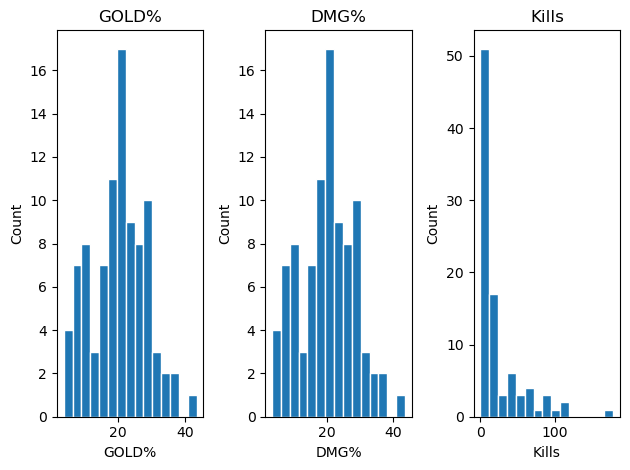

In [10]:
gold_df = lol_df.loc[:, 'DMG%']
dmg_df = lol_df.loc[:, 'DMG%']
k_df = lol_df.loc[:, 'K']

plt.subplot(1,3,1)
plt.hist(gold_df, edgecolor='w', bins=15)
plt.xlabel("GOLD%")
plt.ylabel("Count")
plt.title('GOLD%')

plt.subplot(1,3,2)
plt.hist(dmg_df, edgecolor='w', bins=15)
plt.xlabel("DMG%")
plt.ylabel("Count")
plt.title('DMG%')

plt.subplot(1,3,3)
plt.hist(k_df, edgecolor='w', bins=15)
plt.xlabel("Kills")
plt.ylabel("Count")
plt.title('Kills')

plt.tight_layout()

As we can see, the `GOLD%` and the `DMG%` variables have a normal distribution while the `K` variable is positively skewed. Also notice that the range of the `K` variable is large. This could be due to the fact that the `K` variable is the total number of kills that an entry had for the entire tournament which would definetly skew the data since there are some champions who played more games than others and thus had more chances to get kills. What we can do to resolve this is to instead use the average number of kills that a champion had by dividing the `K` variable to their respective number of games played (`GP`).

Text(0.5, 1.0, 'Average Kills')

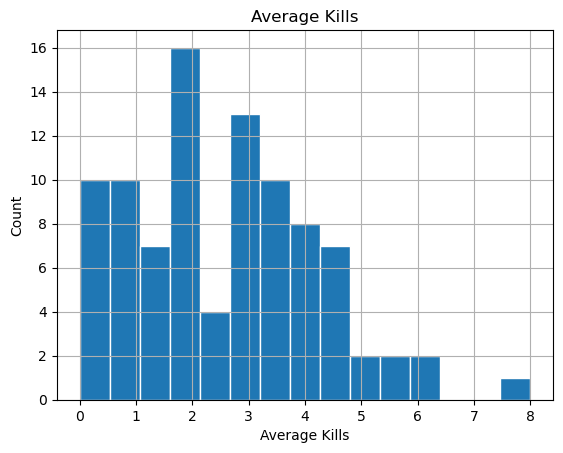

In [11]:
lol_df['Avg Kills'] = lol_df['K'] /  lol_df['GP']
lol_df.hist('Avg Kills', edgecolor='w', bins=15)
plt.xlabel("Average Kills")
plt.ylabel("Count")
plt.title('Average Kills')

The resulting distribution of the `Avg Kills` variable is still slightly skewed but not as much compared to the distribution of the `K` variable. Notice also that the range of its x-axis is a lot smaller compared to the original. Next, we can now check the correlation between the `GOLD%`, `DMG%`, and `Avg Kills` variables. To do this, we correlate them using `pandas.DataFrame.corr()`.

In [12]:
corr_df = lol_df[['DMG%', 'GOLD%', 'Avg Kills']]
corr_df.corr()

,DMG%,GOLD%,Avg Kills
DMG%,1.000000,0.774968,0.520121
GOLD%,0.774968,1.000000,0.549521
Avg Kills,0.520121,0.549521,1.000000


There are a few inferences arrive looking at the table:
1. There is a **positive correlation** between the share of gold (GOLD%) to the share of damage (DMG%).
2. There is a **positive correlation** between the share of damage (DMG%) to the average kills.
3. There is a **positive correlation** between the share of gold (GOLD%) to the average kills.

These inferences are better visualized using the scatter plot.

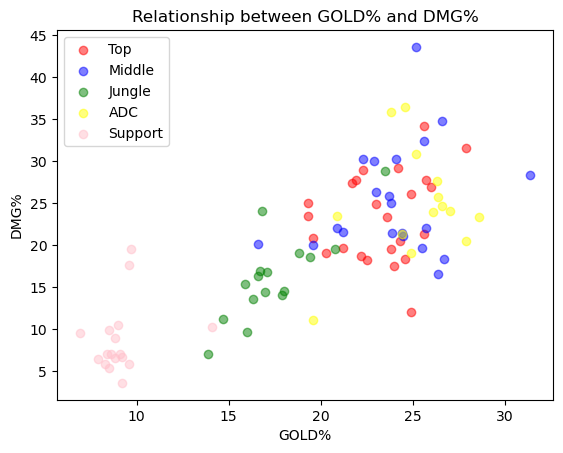

In [13]:
x = lol_df.loc[lol_df["Pos"] == "Top", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Top", 'DMG%']
plt.scatter(x, y, color='red', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Middle", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Middle", 'DMG%']
plt.scatter(x, y, color='blue', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Jungle", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Jungle", 'DMG%']
plt.scatter(x, y, color='green', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "ADC", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "ADC", 'DMG%']
plt.scatter(x, y, color='yellow', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Support", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Support", 'DMG%']
plt.scatter(x, y, color='pink', alpha=0.5)

plt.title('Relationship between GOLD% and DMG%')
plt.xlabel("GOLD%")
plt.ylabel("DMG%")
plt.legend(['Top', 'Middle', 'Jungle', 'ADC', 'Support'])

As we can see, the dispersion of data indicates that higher gold is correlated to a higher share of damage. This means that the correlation of GOLD% and DMG% is positive. Based on the plot, we can also see that the champions playing a support role tend to recieve less gold and deal less damage while other positions such as ADC and Middle tend to recieve more gold and deal more damage. 

Now, let's take a look at the scatter plot between the DMG% and the average number of kills.

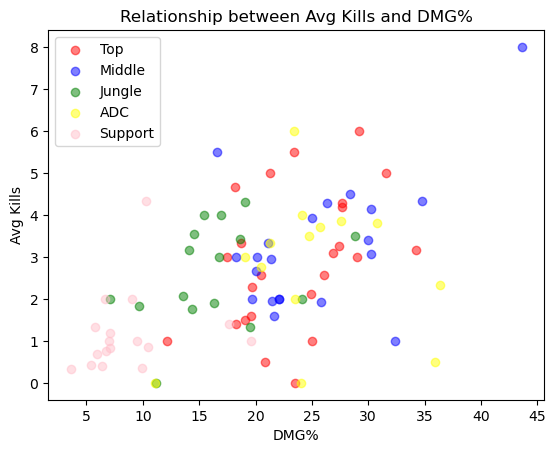

In [14]:
x = lol_df.loc[lol_df["Pos"] == "Top", 'DMG%']
y = lol_df.loc[lol_df["Pos"] == "Top", 'Avg Kills']
plt.scatter(x, y, color='red', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Middle", 'DMG%']
y = lol_df.loc[lol_df["Pos"] == "Middle", 'Avg Kills']
plt.scatter(x, y, color='blue', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Jungle", 'DMG%']
y = lol_df.loc[lol_df["Pos"] == "Jungle", 'Avg Kills']
plt.scatter(x, y, color='green', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "ADC", 'DMG%']
y = lol_df.loc[lol_df["Pos"] == "ADC", 'Avg Kills']
plt.scatter(x, y, color='yellow', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Support", 'DMG%']
y = lol_df.loc[lol_df["Pos"] == "Support", 'Avg Kills']
plt.scatter(x, y, color='pink', alpha=0.5)

plt.title('Relationship between Avg Kills and DMG%')
plt.xlabel("DMG%")
plt.ylabel("Avg Kills")
plt.legend(['Top', 'Middle', 'Jungle', 'ADC', 'Support'])

We can now see that the correlation is also true in terms of GOLD% and the average number of kills as higher damage is correlated to a higher average of kills. Simmilar to the previous scatter plot, the support role tends to deal less damage and receive less kills while other positions such as Top and Middle deal more damage and recieve more kills. It is also interesting to see that although the Jungle positions does not necessarily deal the most damage, it does receive quite a lot of kills compared to other positions. 

Next, let's take a look at the scatter plot of GOLD% to average number of kills.

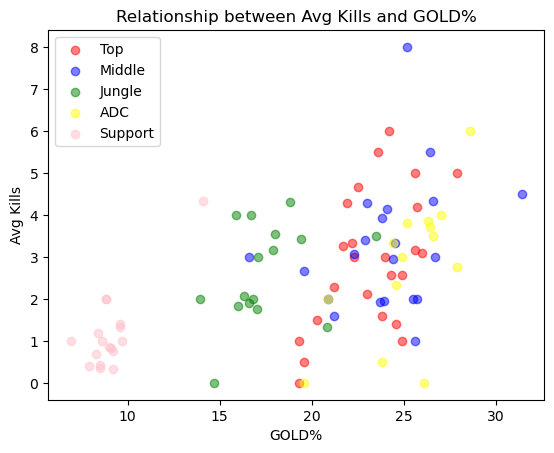

In [15]:
x = lol_df.loc[lol_df["Pos"] == "Top", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Top", 'Avg Kills']
plt.scatter(x, y, color='red', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Middle", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Middle", 'Avg Kills']
plt.scatter(x, y, color='blue', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Jungle", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Jungle", 'Avg Kills']
plt.scatter(x, y, color='green', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "ADC", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "ADC", 'Avg Kills']
plt.scatter(x, y, color='yellow', alpha=0.5)

x = lol_df.loc[lol_df["Pos"] == "Support", 'GOLD%']
y = lol_df.loc[lol_df["Pos"] == "Support", 'Avg Kills']
plt.scatter(x, y, color='pink', alpha=0.5)

plt.title('Relationship between Avg Kills and GOLD%')
plt.xlabel("GOLD%")
plt.ylabel("Avg Kills")
plt.legend(['Top', 'Middle', 'Jungle', 'ADC', 'Support'])

Based on the scatter plot, we can see that higher gold earned also correlates to a higher average number of kills. Like the previous plot, the support position generally receives less gold and receives less amount of average kills while other positions, specifically Top and Middle, generaly receive more gold and receive a higher number of average kills.

Looking at the three plots, the Support role seems to received the least is unqiue since although it does the least damage on the team, it does give majority of its gold and kills to the other positions. There are different types of Supports in League of Legends: **Tank**, **Enchanter**, **Poke**, **Damage**, **Utility**, and **Pick**. Their job at the start of the game is to assist the ADC since their area of effect is wide, and their damage increases through build, and experience, which is why it is important for the Support to avoid getting last hitting creeps, thereby gaining gold, especially at the early game. After meeting this objective, Supports can now roam to assist other players (Ferriday, 2022).

Because of this, we want to also see the correlation between the Assists (`A`) of the support to the `DMG%` and `GOLD%`. To do this, we must first isolate all of the entries that have a `Pos` value of "Support" and extract only the variables we need which are the `DMG%`, `GOLD%`, `A`, and `GP` variables. After which we create a deep copy of it and assign it to a variable called `sup_df` and view the shape of its distribution through a histogram.

Text(0, 0.5, 'Count')

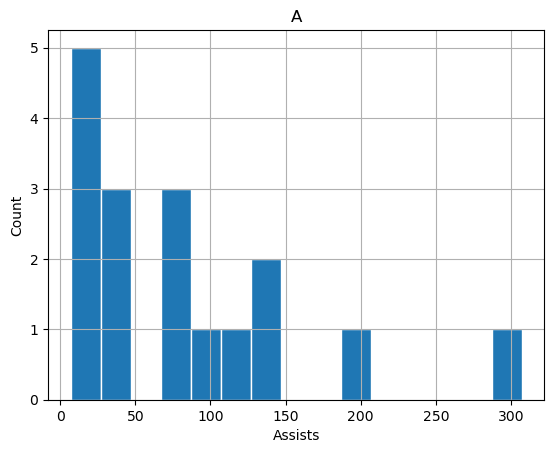

In [16]:
support_df = lol_df.loc[lol_df["Pos"] == "Support", ['DMG%', 'GOLD%', 'A', 'GP']].copy(True) 
support_df.hist('A', edgecolor='w', bins=15)
plt.xlabel("Assists")
plt.ylabel("Count")

As we can see, the distribution of the variable is skewed and its x-axis range is quite large. Simmilar to what we did earlier with the `K` variable, we need to get the average assists of an entry by dividing its `A` variable to the number of games played (`GP`).

Text(0.5, 1.0, 'Assist')

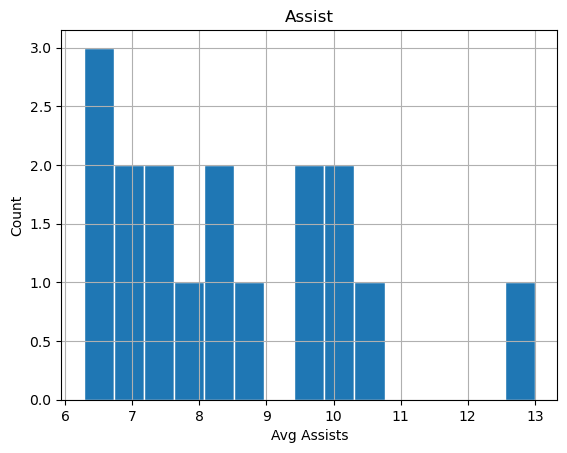

In [17]:
support_df['Avg Assists'] = support_df['A'] /  support_df['GP']
support_df.hist('Avg Assists', edgecolor='w', bins=15)
plt.xlabel("Avg Assists")
plt.ylabel("Count")
plt.title("Assist")

Now that we have our average number of assists per support, we can now check the correlation between the `GOLD%`, `DMG%`, and `Avg Assists` variables using the `pandas.DataFrame.corr()`.

In [18]:
support_df.drop(['GP','A'], axis=1).corr()

,DMG%,GOLD%,Avg Assists
DMG%,1.000000,0.240619,-0.252885
GOLD%,0.240619,1.000000,-0.084930
Avg Assists,-0.252885,-0.084930,1.000000


There are a few inferences arrive looking at the table:
1. There is a **negative correlation** between the share of damage (DMG%) to the average number of assists made.
2. There is a **negative correlation** between the share of gold (GOLD%) to the the average number of assists.

These inferences are better visualized using the scatter plot.

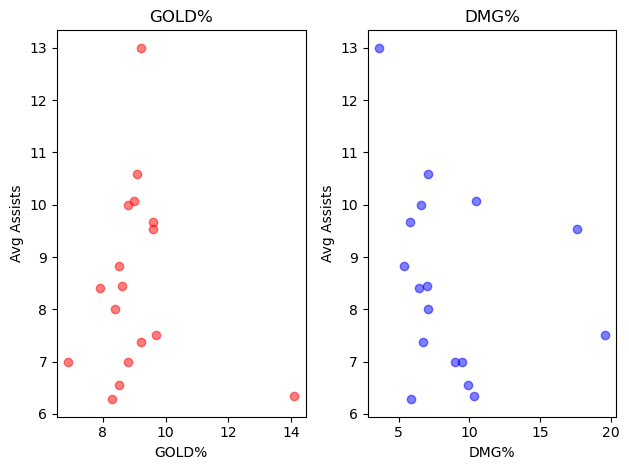

In [19]:
plt.subplot(1,2,1)
plt.scatter(x=support_df['GOLD%'], y=support_df['Avg Assists'], color='red', alpha=0.5 )
plt.xlabel("GOLD%")
plt.ylabel("Avg Assists")
plt.title('GOLD%')

plt.subplot(1,2,2)
plt.scatter(x=support_df['DMG%'], y=support_df['Avg Assists'], color='blue', alpha=0.5 )
plt.xlabel("DMG%")
plt.ylabel("Avg Assists")
plt.title('DMG%')

plt.tight_layout()

Looking at the first scatter plot (left), supports with a higher number of average assists have a lower share of gold. This is true by definition of the variables. `GOLD%` is the percentage of share of gold to the team. Meaning, a higher percentage of gold earned will mean lower percentage of share for the rest of the positions. For example, the GOLD% of a Support is **25%**. Calculating the share of other positions, they have an estimated percentage of **18.75%** which is lower. 

Reflecting back at the positive correlation between kills and share of gold of the other positions, it is also true that lower share of gold results to a lower number of kills. Since assists are incremented whenever a help is initiated to the champion who kills an enemy, it is now inferred that the lower number of assists is due to a higher share of gold earned.

Looking at the second scatter plot (right), the reason of a negative correlation between DMG% and average assists is similar to the previous explanaition. Looking at the definition of `DMG%`, a higher damage share will also mean a lower damage share of the other positions. If the Support has a higher share of damage, this means that they are most likely 'stealing' more kills from other positions. Since the damage of the other positions is important to efficiently kill an enemy champion, getting more kills may mean that the other players are not going to be stronger as the fight progresses. Hence, Supports with higher damage tend to have lower assists at the end of the game.

**ANSWER:** The results of the analysis show that there exists a postive correlation between the `DMG`, `GOLD` and `Avg Kills` of a champion. The scatter plots produce also suggest that certain positions have pattern in terms of the used varaibles. For example, the `Support` position tend to have the least share in gold and damage and also recieve the less kills while positions like `ADC`, `Middle` and `Top` tend to recieve more gold, deal more damage, and get more kills. In light of this, we can suggest that it is important, especially for Top, Middle, Jungle, and ADC to earn gold, especially at the start of the game, so that they can gain a higher damage leading to a higher number of kills. On the other hand, if a player uses a Support champion, they are **not** recommended to give prioritization on earning gold especially at the start of the game. To have a better team fight performance, supports are recommended to utilize their own champion's skills to assist the champions of other positions.


**Reference:** Ferriday, A. (2022, January 22). League Of Legends: Complete Support Guide. Retrieved from The Gamer: https://www.thegamer.com/league-legends-how-play-support/#:~:text=Despite%20often%20being%20viewed%20as,and%20playstyles%20to%20the%20table.

---
### EDA 2: What Position obtains the highest creep score?
In League of Legends, a standard team usually consists of 5 players, each with different positions namely `Top`, `Middle`, `Jungle`, `ADC`, and `Support`. With these positions in mind, we also know the different positions primarily play in different areas of the map (e.g. `Top` would be found on the top-most lane most of the time). With this in mind, this EDA wants to find out which position is capable of getting the highest creep score per minute (`CSPM`). Since we know from EDA 1 that the gold earned is positviely correlated to both the kills and the damage done by champions, the answer to this EDA will be able to help teams know who to pressure and focus so that the targetted player is unable to power themselves up quickly in contrast, which lane to send their carry in so that they can earn more resources faster.

To answer this EDA, we will be making use of the following variables:
- **`CSPM`**: Average monsters + minions killed per minute
- **`Pos`**: Position the champion played in. Values include Top, Middle, ADC, Jungle, and Support

To begin, we can start by visualizing how many champions we have for each position.

Text(0.5, 1.0, 'Number of Champions picked based on position')

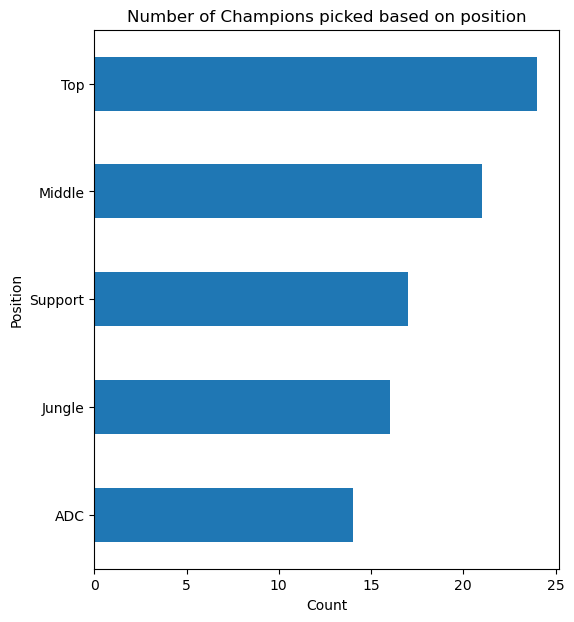

In [20]:
pos_count = lol_df['Pos'].value_counts()
pos_count

pos_count.plot.barh(figsize=(6,7)).invert_yaxis()
plt.ylabel('Position')
plt.xlabel('Count')
plt.title('Number of Champions picked based on position')

In [21]:
pos_count

Top        24
Middle     21
Support    17
Jungle     16
ADC        14
Name: Pos, dtype: int64

Based on the graph, we can see that the Position with the most unique champions was the `Top` Position followed by `Middle`, `Support`, `Jungle`, and then lastly `ADC`. For the exact number for each Position, we have 24 for `Top`, 21 for`Middle`, 17 for `Support`, 16 for `Jungle`, and 14 for `ADC`, coming up with a total of 92 different entries for all Positions.

Now in order to determine which Position obtains the highest creep score per minute, we will be comparing them with their `CSPM` variable. In analyzing the data, we will have two options, either use the mean or the median. In the mean time, we will be getting both of them, together with the standard deviation on the off chance that we will need to compute further using it.

In [22]:
from IPython.display import display_html 

lol_mean_median_std = lol_df.agg({"CSPM": ["mean", "median", "std"]})
overall_DMG = lol_mean_median_std.style.set_table_attributes("style='display:inline'").set_caption('Overall CSPM')

pos_mean_median_std = lol_df.groupby('Pos')['CSPM'].agg(["mean", "median", "std"])
pos_mean_median_std.reset_index(inplace=True)
pos_CSPM = pos_mean_median_std.style.hide(axis='index').set_table_attributes("style='display:inline'").set_caption('CSPM by Position')

space = "\xa0" * 10 #spacing between the tables

display_html(overall_DMG._repr_html_() + space + pos_CSPM._repr_html_(), raw=True)

Overall CSPM 
 
 
   
 CSPM 
 
 
 
 
 mean 
 6.463043 
 
 
 median 
 7.600000 
 
 
 std 
 2.968802 
 
 
 
          
 
 CSPM by Position 
 
 
 Pos 
 mean 
 median 
 std 
 
 
 
 
 ADC 
 8.978571 
 9.150000 
 0.689681 
 
 
 Jungle 
 5.375000 
 5.300000 
 0.838650 
 
 
 Middle 
 8.304762 
 8.300000 
 0.955759 
 
 
 Support 
 0.976471 
 1.100000 
 0.336395 
 
 
 Top 
 7.995833 
 7.900000 
 0.893201

Now basing it off the results, we can see that the `CSPM` variable of our dataset has a mean of `6.46`, a median of `7.6`, and a standard deviation of `2.97`. After grouping the entries by their Position, we can see that the highest mean and median are both under the `ADC` Position where mean is `8.98` and median is `9.15`.

We can also use a boxplot in order to better compare `CSPM` by `Pos` and identify the dispersion and skewness of the data. With a box plot, we are able to see the maximum, minimum, first quartile, third quartile, and the median of each. The box plot also shows the outliers for each category.

<AxesSubplot:title={'center':'CSPM'}, xlabel='Pos'>

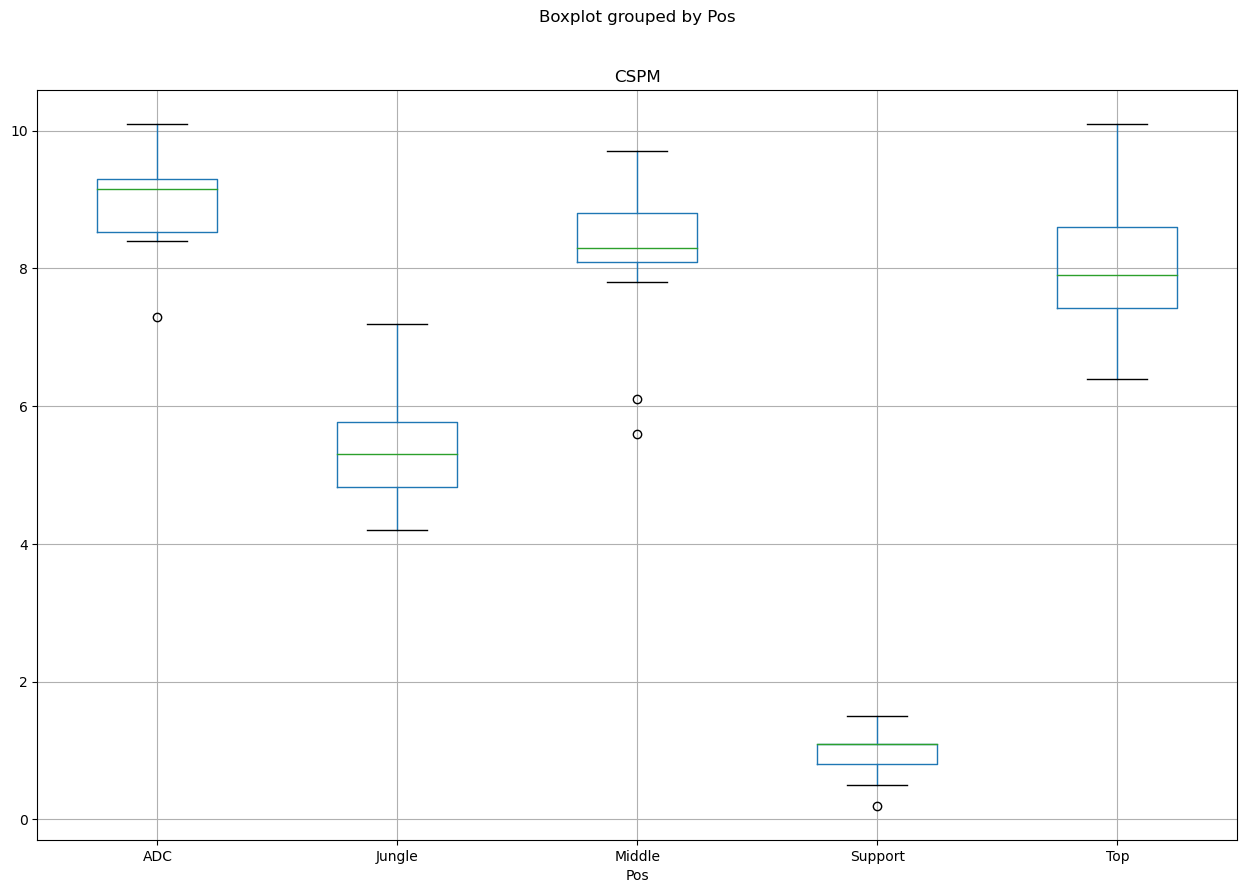

In [23]:
lol_df.boxplot("CSPM", by="Pos", figsize=(15,10))

With the boxplot, we are able to better visualize the data. Based on the results, we can see that both Jungle and Top have relatively normal distribution while ADC, Middle, and Support have skewed distribution.

There are also outliers present but since there are barely any, if none for each category, we will not perform any operations on them.

**ANSWER:** Based on the stastitics that we computed for earlier and the box plots that we produced, we can say that the position capable of obtaining the highest creep score per minute would be `ADC` position since it has the highest median and mean among the group. In light of this, it is advised for teams to target the enemy ADC so that they are unable to farm creeps and minions properly. If the ADC is currently dead or struggling already, the best positions to focus would be `Middle` Position, followed by the `Top` Position, then the `Jungle` Position, and lastly the `Support` Position. By focusing the champions in this order, we will decrease the amount of creeps and minions per minute of the said Positions, which will in turn give them a harder time to strengthen themselves.

---
### EDA 3: What Position is capable of doing the most share of damage in a team?
Since we know which postion is most likely to get the most resoruces (creeps), it will also help to know which position deals the most damage in a team. As metioned earlier a team usually consists of 5 different positions and although these positions do not have to be followed at all, it has become the main way that almost all players use to play the game. Knowing which position is your main source of damage allows your team to play around that position and protect them so that they can maximize their damage output. In light of this, the EDA wants to know which position is capabable of doing the most damage in a team (`DMG%`) which will help teams know who to protect and who to target first during a team fight. 

In order to determine which Position is capable of doing the most damage in a team, we will be comparing them by their `DMG%` variable. We have 2 main options in this scenario, we can either use the mean or the median. For now we will be getting both of them, along with the standard deviation of the `DMG%` variable. We will first do this for the entire data set and then repeat the process again but with each record grouped by their `Pos` variable. 

In [24]:
from IPython.display import display_html 

lol_mean_median_std = lol_df.agg({"DMG%": ["mean", "median", "std"]})
overall_DMG = lol_mean_median_std.style.set_table_attributes("style='display:inline'").set_caption('Overall DMG%')

Pos_mean_median_std = lol_df.groupby('Pos')['DMG%'].agg(["mean", "median", "std"])
Pos_mean_median_std.reset_index(inplace=True)
pos_DMG = Pos_mean_median_std.style.hide(axis='index').set_table_attributes("style='display:inline'").set_caption('DMG% by Position')

space = "\xa0" * 50 #spacing between the tables

display_html(overall_DMG._repr_html_() + space + pos_DMG._repr_html_(), raw=True)

Overall DMG% 
 
 
   
 DMG% 
 
 
 
 
 mean 
 20.106522 
 
 
 median 
 20.300000 
 
 
 std 
 8.338917 
 
 
 
                                                  
 
 DMG% by Position 
 
 
 Pos 
 mean 
 median 
 std 
 
 
 
 
 ADC 
 24.864286 
 24.050000 
 6.551994 
 
 
 Jungle 
 16.256250 
 15.850000 
 5.260161 
 
 
 Middle 
 25.295238 
 22.100000 
 6.516324 
 
 
 Support 
 8.705882 
 7.100000 
 4.189641 
 
 
 Top 
 23.433333 
 23.450000 
 5.233809

Based on the results, we can see that the `DMG%` of our dataset has a mean of 20.10, a median of 20.30 and a standard deviation of 8.33. Grouping the entries by their `Pos` variable, we see that the Middle category has the highest mean among the 5 positions. However, if we were to base it on the median, then ADC would have the highest `DMG%`. The standard deviation is also useful and will be used later on in the analysis. In order to determine which statistic is appropriate in representing the group, we will look into the distribution of each of the groups. 

The next thing we can do is to analyze the histogram of each `Pos` based on their `DMG%` variable. Doing so will provide us with an idea of each of their respcetive distributions shapes. 

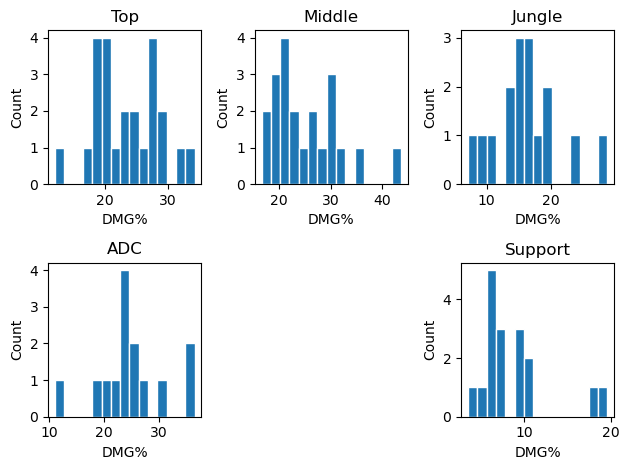

In [25]:
top_df = lol_df.loc[lol_df["Pos"] == "Top", 'DMG%']
middle_df = lol_df.loc[lol_df["Pos"] == "Middle", 'DMG%']
jungle_df = lol_df.loc[lol_df["Pos"] == "Jungle", 'DMG%']
adc_df = lol_df.loc[lol_df["Pos"] == "ADC", 'DMG%']
support_df = lol_df.loc[lol_df["Pos"] == "Support", 'DMG%']

plt.subplot(2,3,1)
plt.hist(top_df, edgecolor='w', bins=15)
plt.xlabel("DMG%")
plt.ylabel("Count")
plt.title('Top')

plt.subplot(2,3,2)
plt.hist(middle_df, edgecolor='w', bins=15)
plt.xlabel("DMG%")
plt.ylabel("Count")
plt.title('Middle')

plt.subplot(2,3,3)
plt.hist(jungle_df, edgecolor='w', bins=15)
plt.xlabel("DMG%")
plt.ylabel("Count")
plt.title('Jungle')

plt.subplot(2,3,4)
plt.hist(adc_df, edgecolor='w', bins=15)
plt.xlabel("DMG%")
plt.ylabel("Count")
plt.title('ADC')

plt.subplot(2,3,6)
plt.hist(support_df, edgecolor='w', bins=15)
plt.xlabel("DMG%")
plt.ylabel("Count")
plt.title('Support')

plt.tight_layout()

The histograms show that results for Top, Jungle, and ADC take the form of a somewhat normal distribution while the histograms for Middle and Support roles are positvely skewed. Knowing the shape of the ditribution is important as it allows us to determine the appropriate measure of central tendency that we should use in order to describe the data.

We can also use a boxplot in order to better compare `DMG%` by `Pos`. With a box plot, we are able to see the maximum, minimum, first quartile, third quartile, and the median of each. The box plot also shows the outliers for each category.

<AxesSubplot:title={'center':'DMG%'}, xlabel='Pos'>

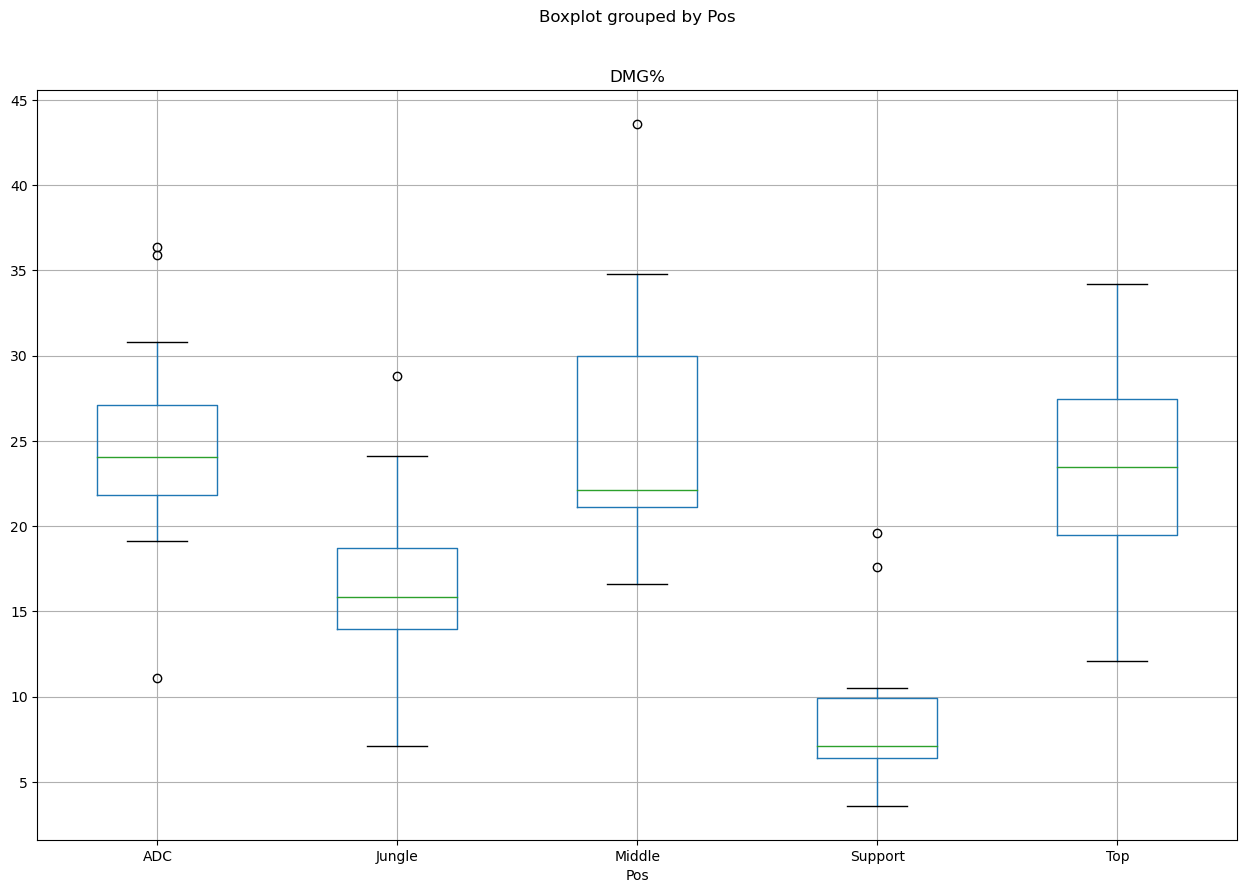

In [26]:
lol_df.boxplot("DMG%", by="Pos", figsize=(15,10))

With the boxplot, we are able to better visualize the data. Based on the results, we can confirm that ADC, Jungle, and Top have relatively normal distribution while both Middle and Support have skewed distribution.

From this, we can assume that it would be best to use the median as the measure of central tendency for both the Middle and Support categories since it is advised that the median be used with groups that are skewed. For ADC, Jungle and Top, any of the three measures of central tendency (mean, meadian, mode) can be used since they are all normally distributed and thus we will also use the median for these 3 categories. 

There are also outliers present but since they are relatively few for each category, we will not perform any operations on them. Additionally,  the number of entries for each category is relatively small and thus we cannot really afford to discard these entries. The values of these outliers are also possible values, meaning they aren't wrong or incorrect data and we believe that these outliers are an important part of out data set.  

**ANSWER:** Based on the stastitics that we computed for earlier, and the histograms/box plots that we produced, we can say that the position capable of doing the most damage share in a team is the `ADC` position since it has the highest median among the group. In light of this, it is advised for teams to target the enemy ADC first while priotizing their own ADC in team fights. Once the ADC has been defeated, the next position that deals the most damage share would be `Top`, followed by `Middle`, then `Jungle`, and lastly `Support`. Taking out the enemy champions in this order will greatly decrease the fighting power of the enemy team. 

---
## Research Question

### Is there is a clear distinction in terms of the positions when clustering the entries based on their team damage share, team gold share, creep score per minute, and their average kills?
Upon completing the data analysis, we observed that there seems to be a pattern based on the postions of the entries. For example, the first EDA question concluded that there is a positive correlation between the gold share, damage share and average number of kills of the entries. It also showed us a pattern through the scatter plots that it produced wherein we can see that groups according to their `Pos` varaible seem to occupy a similar area.

The second EDA 2 discussed which position has the highest `CSPM` and concluded that it is the ADC that earns the most creep score. As a result, enemy teams should look to hinder the ADC as a higher creep score may lead to more gold which we learned is positively correlated to damage and kills from EDA 1. EDA 2 also showed the creep score of the other positions and we noticed that they are somewhat close to each other despite being from different categories.

The third and final EDA discussed which position has the highes `DMG%` and concluded that the ADC deals the most damage, followed by Top, Middle, Jungle and Support. As a result, teams should look to target the enemy team's ADC first while protecting their own ADC if they want to minimize their opponent's fighting power while maximing their own. However, similar to EDA 2, we observed that the values of the `DMG%` variable are close to one another despite it being from different categories.

This leads us to question if there is a clear distinction in terms of the postions when clustering the entries based on their `DMG%`, `GOLD%`, `CSPM`, and average kills. By clustering the data set, we will be able to find out if there is a distinction between the 5 positions based on the stated variables. Knowing if there are distinctions between the positions or which positions are simmilar to each other will give us insights on which champions can be played in each position and the flexibility of a champion to play a position that it was not originally intended for. This question is significant to the LOL community because it could define the meta of the game and may provide new strategies and tactics that could help lead a team to victory.

---
# Phase 2

## Data Modeling
In order to answer our research question, we will be utilizing the `KMeans()` function from the sklearn library to cluster our dataset. Before clustering however, we need to standardise our data. This step is important as we will be using 4 different variables (`DMG%`, `Gold%`, `CSPM`, Average kills) which do not necesarily use the same scale and range which may cause some variables to have more influence on the results compared to others. To standardise our data set, we need to take the mean of each variable, subtract the mean from each value, then finally divide that result by the standard deviation of the variable. To make things simpler, we can make use of the `StandardScaler` object and its `fit_transform()` method from the sklearn librar.

In [27]:
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

After importing, we can prepare our dataset so that only the `Pos`, `GOLD%`, `DMG%`, `CSPM`, and `Avg Kills` columns remain

In [28]:
preped_df = lol_df[['Pos', 'GOLD%', 'DMG%', 'CSPM', 'Avg Kills']].copy(True)
preped_df

,Pos,GOLD%,DMG%,CSPM,Avg Kills
0,Middle,20.9,22.1,8.8,2.000000
1,Top,24.0,17.5,7.9,3.000000
2,Support,8.4,7.1,0.9,1.200000
3,Support,8.8,6.6,0.8,2.000000
4,Middle,16.6,20.1,5.6,3.000000
...,...,...,...,...,...
87,Middle,25.5,19.7,8.3,2.000000
88,Support,9.6,17.6,0.2,1.400000
89,ADC,24.6,36.4,9.1,2.333333
90,Support,9.2,3.6,1.1,0.333333


Now we create a StandardScaler object and create new columns to place our standardised values in.

In [29]:
scaler = StandardScaler()
preped_df[['S_GOLD%', 'S_DMG%', 'S_CSPM', 'S_Avg Kills']] = scaler.fit_transform(preped_df[['GOLD%', 'DMG%', 'CSPM', 'Avg Kills']])
preped_df

,Pos,GOLD%,DMG%,CSPM,Avg Kills,S_GOLD%,S_DMG%,S_CSPM,S_Avg Kills
0,Middle,20.9,22.1,8.8,2.000000,0.129507,0.240367,0.791485,-0.379203
1,Top,24.0,17.5,7.9,3.000000,0.625286,-0.314286,0.486671,0.253497
2,Support,8.4,7.1,0.9,1.200000,-1.869600,-1.568284,-1.884102,-0.885362
3,Support,8.8,6.6,0.8,2.000000,-1.805628,-1.628572,-1.917970,-0.379203
4,Middle,16.6,20.1,5.6,3.000000,-0.558185,-0.000786,-0.292297,0.253497
...,...,...,...,...,...,...,...,...,...
87,Middle,25.5,19.7,8.3,2.000000,0.865179,-0.049017,0.622144,-0.379203
88,Support,9.6,17.6,0.2,1.400000,-1.677685,-0.302228,-2.121180,-0.758822
89,ADC,24.6,36.4,9.1,2.333333,0.721243,1.964615,0.893090,-0.168303
90,Support,9.2,3.6,1.1,0.333333,-1.741657,-1.990303,-1.816366,-1.433702


It is also important to note that since we want to be able to plot our data, we must find a way to represent this multi-variable dataset in a two varaible plot. To do this we can use a `PCA()` object to conduct a Principal Component Analysis and reduce the number of variables to our desired number. 

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #set number of components to reduce to
principalComponents = pca.fit_transform(preped_df.loc[:, ['S_GOLD%', 'S_DMG%', 'S_CSPM', 'S_Avg Kills']]) #reduce the standardised columns to just 2
standardised_pc_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2']) #assign it to a new dataframe

cluster_df = pd.concat([standardised_pc_df, preped_df[['Pos']]], axis = 1) #add the positions

cluster_df

,PC1,PC2,Pos
0,0.465690,-0.680302,Middle
1,0.545098,-0.056278,Top
2,-3.178526,0.421465,Support
3,-2.992442,0.881838,Support
4,-0.364294,0.454281,Middle
...,...,...,...
87,0.634750,-0.749659,Middle
88,-2.508159,0.475739,Support
89,1.802384,-0.797533,ADC
90,-3.501499,-0.089559,Support


Now that we have reduced our number of variables to 2, we can now apply our k-means algorithm. The `KMeans` function takes in n_clusters which is the number of clusters we want to have. Usually we would need to do an elbow plot in order to find the optimal number of clusters but since we want to know if there is a distinction between the 5 possible values of the `Pos` variable, we will set the n_clusters to 5. 

In [31]:
kmeans = cluster.KMeans(n_clusters = 5)
kmeans.fit(cluster_df[['PC1', 'PC2']])
cluster_df["cluster"] = kmeans.labels_ #add the cluster number

cluster_df

,PC1,PC2,Pos,cluster
0,0.465690,-0.680302,Middle,3
1,0.545098,-0.056278,Top,0
2,-3.178526,0.421465,Support,1
3,-2.992442,0.881838,Support,1
4,-0.364294,0.454281,Middle,2
...,...,...,...,...
87,0.634750,-0.749659,Middle,3
88,-2.508159,0.475739,Support,1
89,1.802384,-0.797533,ADC,0
90,-3.501499,-0.089559,Support,1


Now that we have our clusters, we can better visualize them by plotting.

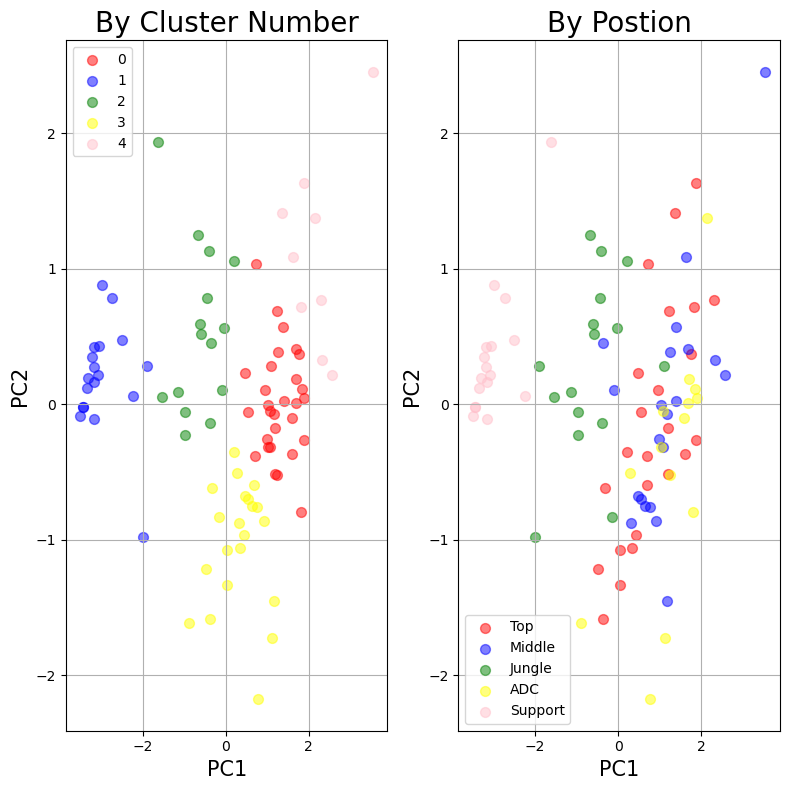

In [32]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('By Cluster Number', fontsize = 20)
cluster_no = [0, 1, 2, 3, 4]
colors = ['red', 'blue', 'green', 'yellow', 'pink']
for cluster_no, color in zip(cluster_no, colors):
    indicesToKeep = cluster_df['cluster'] == cluster_no
    ax.scatter(cluster_df.loc[indicesToKeep, 'PC1']
               , cluster_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50
               , alpha = .5)
ax.legend([0, 1, 2, 3, 4,])
ax.grid()

ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('By Postion', fontsize = 20)
positions = ['Top', 'Middle',  'Jungle',  'ADC',  'Support']
colors = ['red', 'blue', 'green', 'yellow', 'pink']
for pos, color in zip(positions, colors):
    indicesToKeep = cluster_df['Pos'] == pos
    ax.scatter(cluster_df.loc[indicesToKeep, 'PC1']
               , cluster_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50
               , alpha = .5)
ax.legend(positions)
ax.grid()

plt.tight_layout()

Here, we produced two plots. The plot on the left represents the points colored according to the cluster that they belong to while the plot on the right is colored according to their respective `Pos` variable. Comparing the two plots, we see that cluster 1 and cluster 2 are predominantly occupied by points belonging to the `Support` and `Jungle` positins respectively. The remaining three clusters (0, 3, 4) have a mix of `Top`, `Middle` and `ADC` positions. This is better shown numerically.  

In [37]:
cluster_0 = cluster_df.loc[cluster_df['cluster'] == 0]
cluster_1 = cluster_df.loc[cluster_df['cluster']== 1]
cluster_2 = cluster_df.loc[cluster_df['cluster'] == 2]
cluster_3 = cluster_df.loc[cluster_df['cluster'] == 3]
cluster_4 = cluster_df.loc[cluster_df['cluster'] == 4]

print('Number of data points in each Position:')
print(cluster_df['Pos'].value_counts())

print('\n\nNumber of data points in each cluster:')
print('Cluster 0:')
print('Position Top:\t\t', cluster_0.loc[cluster_0['Pos'] == 'Top'].shape[0])
print('Position Middle:\t', cluster_0.loc[cluster_0['Pos'] == 'Middle'].shape[0])
print('Position Jungle:\t', cluster_0.loc[cluster_0['Pos'] == 'Jungle'].shape[0])
print('Position ADC:\t\t', cluster_0.loc[cluster_0['Pos'] == 'ADC'].shape[0])
print('Position Support:\t', cluster_0.loc[cluster_0['Pos'] == 'Support'].shape[0])

print('\nCluster 1:')
print('Position Top:\t\t', cluster_1.loc[cluster_1['Pos'] == 'Top'].shape[0])
print('Position Middle:\t', cluster_1.loc[cluster_1['Pos'] == 'Middle'].shape[0])
print('Position Jungle:\t', cluster_1.loc[cluster_1['Pos'] == 'Jungle'].shape[0])
print('Position ADC:\t\t', cluster_1.loc[cluster_1['Pos'] == 'ADC'].shape[0])
print('Position Support:\t', cluster_1.loc[cluster_1['Pos'] == 'Support'].shape[0])

print('\nCluster 2:')
print('Position Top:\t\t', cluster_2.loc[cluster_2['Pos'] == 'Top'].shape[0])
print('Position Middle:\t', cluster_2.loc[cluster_2['Pos'] == 'Middle'].shape[0])
print('Position Jungle:\t', cluster_2.loc[cluster_2['Pos'] == 'Jungle'].shape[0])
print('Position ADC:\t\t', cluster_2.loc[cluster_2['Pos'] == 'ADC'].shape[0])
print('Position Support:\t', cluster_2.loc[cluster_2['Pos'] == 'Support'].shape[0])

print('\nCluster 3:')
print('Position Top:\t\t', cluster_3.loc[cluster_3['Pos'] == 'Top'].shape[0])
print('Position Middle:\t', cluster_3.loc[cluster_3['Pos'] == 'Middle'].shape[0])
print('Position Jungle:\t', cluster_3.loc[cluster_3['Pos'] == 'Jungle'].shape[0])
print('Position ADC:\t\t', cluster_3.loc[cluster_3['Pos'] == 'ADC'].shape[0])
print('Position Support:\t', cluster_3.loc[cluster_3['Pos'] == 'Support'].shape[0])

print('\nCluster 4:')
print('Position Top:\t\t', cluster_4.loc[cluster_4['Pos'] == 'Top'].shape[0])
print('Position Middle:\t', cluster_4.loc[cluster_4['Pos'] == 'Middle'].shape[0])
print('Position Jungle:\t', cluster_4.loc[cluster_4['Pos'] == 'Jungle'].shape[0])
print('Position ADC:\t\t', cluster_4.loc[cluster_4['Pos'] == 'ADC'].shape[0])
print('Position Support:\t', cluster_4.loc[cluster_4['Pos'] == 'Support'].shape[0])


Number of data points in each Position:
Top        24
Middle     21
Support    17
Jungle     16
ADC        14
Name: Pos, dtype: int64


Number of data points in each cluster:
Cluster 0:
Position Top:		 11
Position Middle:	 8
Position Jungle:	 1
Position ADC:		 9
Position Support:	 0

Cluster 1:
Position Top:		 0
Position Middle:	 0
Position Jungle:	 2
Position ADC:		 0
Position Support:	 16

Cluster 2:
Position Top:		 0
Position Middle:	 2
Position Jungle:	 12
Position ADC:		 0
Position Support:	 1

Cluster 3:
Position Top:		 9
Position Middle:	 7
Position Jungle:	 1
Position ADC:		 4
Position Support:	 0

Cluster 4:
Position Top:		 4
Position Middle:	 4
Position Jungle:	 0
Position ADC:		 1
Position Support:	 0


Based on the numerical results, we can see that cluster 1 is predominantly occupied by Support positions with 16 out of the total 17 Support entries belonging to this cluster. Cluster 2 on the other hand, is predominantly occupied by Jungle positions with 12 out of the total 16 Jungle entries belonging to this cluster. In contrast, while cluster 0 contains the most entries that are from the Top position (11 out of 24 Top entries) it also contains quite a large number of points that are Middle and ADC positions. Simmilarly, we can see that there is no clear position that dominates clusters 3 and 4 which all contain a mix of Top, Middle, and ADC positions. 